# Grade Insights: Analyzing the Impact of COVID-19 on Student Performance

## Overview

The goal of this notebook is to analyze how the COVID-19 pandemic affected student performance and grading trends at Virginia Tech. By examining course data from before, during, and after the pandemic, we aim to uncover key insights into how the shift to remote learning, changes in grading policies, and adjustments in course delivery impacted student outcomes across various departments and courses.

### Specific Objectives:
- **Analyze GPA trends** across three distinct time periods: before COVID-19, during the pandemic, and after the return to in-person learning.
- **Evaluate grade distributions** to identify shifts in grading practices.
- **Examine withdraw rates** during each time period to understand student retention.
- **Investigate enrollment patterns** to determine any changes in course participation.
- **Compare GPA differences** by department and course, focusing on significant increases or decreases in student performance due to the pandemic.
- **Highlight the courses and departments** that experienced the most significant changes in grading, both positive and negative, during and after the pandemic.

Through these analyses, this notebook provides a comprehensive understanding of how the educational landscape changed during one of the most disruptive events in recent history, offering insights into the lasting effects of the pandemic on student performance and academic outcomes.

**Author: Eric Uehling**  
*Date: 5.3.23*

In [15]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Remove future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load the course data from the data directory
courses = pd.read_csv('data/course_data.csv')
courses

,Academic Year,Term,Subject,Course No.,Course Title,Instructor,GPA,A (%),A- (%),B+ (%),...,C (%),C- (%),D+ (%),D (%),D- (%),F (%),Withdraws,Graded Enrollment,CRN,Credits
0,2016-17,Spring,HORT,3346,Herbaceous Landscape Plants,Scoggins,3.85,37.5,37.5,12.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0,8,19402,0
1,2015-16,Fall,AOE,4984,SS:Design of Projects,Raj,3.82,40.0,60.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,5,89169,1
2,2015-16,Fall,HD,5964,Practicum,Dolbin-MacNab,4.00,100.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,5,83823,1
3,2015-16,Fall,MUS,2244,TS:Clarinet,Wallace,4.00,100.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,5,85240,1
4,2015-16,Fall,TA,3014,Theatre Production Lab,Russo,3.00,60.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,20.0,0,5,88739,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64654,2020-21,Spring,ITDS,1114,Design Appreciation,Tew,3.59,71.3,5.5,4.7,...,2.1,1.1,0.9,1.0,0.5,2.6,73,3263,16592,3
64655,2021-22,Spring,ITDS,1114,Design Appreciation,Tew,3.48,66.6,6.4,6.0,...,2.9,1.1,1.6,1.3,0.7,3.6,77,3334,16728,3
64656,2022-23,Fall,ITDS,1114,Design Appreciation,Tew,3.59,72.6,5.0,4.8,...,2.4,1.3,0.7,0.5,0.7,2.9,59,3358,86752,3
64657,2020-21,Fall,ITDS,1114,Design Appreciation,Tew,3.79,82.3,4.2,3.9,...,0.9,0.4,0.3,0.5,0.2,0.9,5,4036,86220,3


In [16]:
# Define the time windows
before_covid = courses[(courses['Academic Year'] < '2019-20') | 
                       ((courses['Academic Year'] == '2019-20') & (courses['Term'] == 'Fall'))]

during_covid = courses[((courses['Academic Year'] == '2019-20') & (courses['Term'] == 'Spring')) | 
                       ((courses['Academic Year'] == '2020-21') & (courses['Term'].isin(['Fall', 'Spring'])))]

after_covid = courses[(courses['Academic Year'] > '2020-21') | 
                      ((courses['Academic Year'] == '2021-22') & (courses['Term'] == 'Fall'))]

# Display the three new dataframes to check the splits
print("Before COVID DataFrame:")
display(before_covid)

print("During COVID DataFrame:")
display(during_covid)

print("After COVID DataFrame:")
display(after_covid)

Before COVID DataFrame:


,Academic Year,Term,Subject,Course No.,Course Title,Instructor,GPA,A (%),A- (%),B+ (%),...,C (%),C- (%),D+ (%),D (%),D- (%),F (%),Withdraws,Graded Enrollment,CRN,Credits
0,2016-17,Spring,HORT,3346,Herbaceous Landscape Plants,Scoggins,3.85,37.5,37.5,12.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0,8,19402,0
1,2015-16,Fall,AOE,4984,SS:Design of Projects,Raj,3.82,40.0,60.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,5,89169,1
2,2015-16,Fall,HD,5964,Practicum,Dolbin-MacNab,4.00,100.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,5,83823,1
3,2015-16,Fall,MUS,2244,TS:Clarinet,Wallace,4.00,100.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,5,85240,1
4,2015-16,Fall,TA,3014,Theatre Production Lab,Russo,3.00,60.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,20.0,0,5,88739,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64648,2017-18,Spring,GEOG,1014,World Regions,Boyer,3.75,84.8,3.9,1.5,...,1.4,0.5,0.4,0.4,0.0,3.0,98,1678,14570,3
64649,2016-17,Spring,GEOG,1014,World Regions,Boyer,3.75,84.0,4.9,1.4,...,1.0,0.7,0.4,0.4,0.0,2.9,66,1784,14359,3
64650,2016-17,Fall,GEOG,1014,World Regions,Boyer,3.79,86.4,4.2,1.4,...,0.9,0.6,0.5,0.4,0.0,2.1,88,1789,84175,3
64651,2015-16,Spring,GEOG,1014,World Regions,Boyer,3.81,88.0,3.3,1.5,...,0.9,0.5,0.4,0.3,0.0,2.3,67,2075,14252,3


During COVID DataFrame:


,Academic Year,Term,Subject,Course No.,Course Title,Instructor,GPA,A (%),A- (%),B+ (%),...,C (%),C- (%),D+ (%),D (%),D- (%),F (%),Withdraws,Graded Enrollment,CRN,Credits
131,2019-20,Spring,DASC,5004,Seminar,Winston,3.60,20.0,40.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,5,13315,1
132,2019-20,Spring,FIN,3174,Finance Career Strategies,Lytton,3.60,80.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0,5,14899,1
133,2019-20,Spring,HTM,5944,Graduate Seminar,McGehee,4.00,100.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,5,15761,1
134,2019-20,Spring,AOE,4206,Exper for Ocean Vehicle Design,Alexander,3.26,0.0,20.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,5,20478,1
135,2019-20,Spring,AOE,4106,Experiments for AE Design,Coutier-Delgosha,4.00,100.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,5,20493,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64635,2020-21,Spring,AAEC,2104,Personal Financial Planning,White,3.82,87.9,2.9,1.9,...,0.7,0.5,0.0,0.8,0.0,1.7,4,882,10058,3
64641,2019-20,Spring,GEOG,1014,World Regions,Boyer,3.85,87.9,5.7,0.7,...,0.5,0.4,0.3,0.4,0.0,1.4,6,1136,15209,3
64652,2019-20,Spring,ITDS,1114,Design Appreciation,Tew,3.97,97.8,0.5,0.7,...,0.1,0.0,0.0,0.0,0.0,0.2,3,2496,21054,3
64654,2020-21,Spring,ITDS,1114,Design Appreciation,Tew,3.59,71.3,5.5,4.7,...,2.1,1.1,0.9,1.0,0.5,2.6,73,3263,16592,3


After COVID DataFrame:


,Academic Year,Term,Subject,Course No.,Course Title,Instructor,GPA,A (%),A- (%),B+ (%),...,C (%),C- (%),D+ (%),D (%),D- (%),F (%),Withdraws,Graded Enrollment,CRN,Credits
188,2021-22,Fall,ENSC,3124,Soils Laboratory,Mott,2.86,60.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,20.0,0,5,84840,1
189,2021-22,Fall,ENSC,3124,Soils Laboratory,Mott,2.68,40.0,20.0,0.0,...,0.0,20.0,0.0,0.0,0.0,20.0,0,5,84843,1
190,2021-22,Fall,ENSC,3124,Soils Laboratory,Mott,3.80,60.0,20.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,5,84844,1
191,2021-22,Fall,IDS,3234,TS: Studio Magazine,Pritchett,4.00,100.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,5,86114,1
192,2021-22,Fall,ECE,3274,Elctrnc Circuits Lab II,Cooper,3.82,40.0,60.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,5,83465,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64642,2022-23,Fall,BMES,2004,Concussion Perspectives,Duma,3.99,99.2,0.4,0.0,...,0.1,0.0,0.0,0.0,0.0,0.0,1,1185,90714,3
64643,2021-22,Spring,ARCH,1044,Life in the Built Environment,Tew,3.69,76.8,5.6,3.6,...,1.3,1.2,0.9,0.5,0.3,1.8,7,1192,21571,3
64655,2021-22,Spring,ITDS,1114,Design Appreciation,Tew,3.48,66.6,6.4,6.0,...,2.9,1.1,1.6,1.3,0.7,3.6,77,3334,16728,3
64656,2022-23,Fall,ITDS,1114,Design Appreciation,Tew,3.59,72.6,5.0,4.8,...,2.4,1.3,0.7,0.5,0.7,2.9,59,3358,86752,3


## Analyzing Average GPA Before, During, and After COVID-19

One of the key metrics in evaluating course performance and student success is the **average GPA**. The GPA serves as a reflection of student achievement in a particular term and is influenced by various factors, including course difficulty, teaching methodology, and external circumstances.

In the context of our analysis, understanding the average GPA across the **before**, **during**, and **after COVID-19** time periods is essential for identifying any trends or shifts in academic performance:
- **Before COVID-19:** The GPA during this period reflects the "normal" academic environment, where students were engaging with in-person learning.
- **During COVID-19:** With the onset of the pandemic, courses moved online, and many students faced unprecedented challenges, including remote learning, disruptions to campus life, and changes in grading policies. This could potentially lead to fluctuations in GPA (either higher or lower).
- **After COVID-19:** As students returned to in-person or hybrid learning environments, we would expect to see a reversion to previous GPA trends or the emergence of new patterns reflecting the lasting impacts of the pandemic.

Tracking these trends will help us understand the academic adjustments made during COVID-19 and how student performance was affected across these time periods.

### Next Step:
We will now calculate and visualize the average GPA for each of the three time periods (before, during, and after COVID-19) to observe any noticeable trends or shifts.

Average GPA for each time period:


,Time Period,Average GPA
0,Before COVID,3.393447
1,During COVID,3.518942
2,After COVID,3.399596


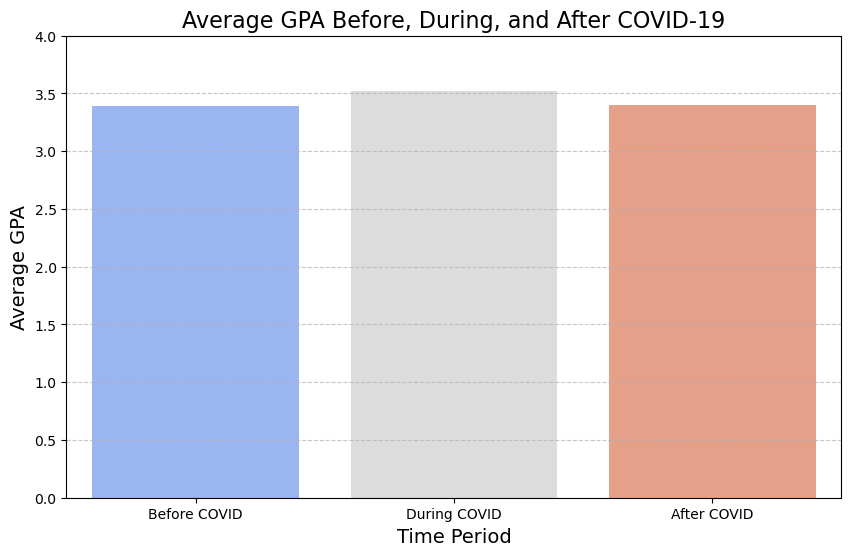

In [17]:
# Calculate the average GPA for each time period
avg_gpa_before = before_covid['GPA'].mean()
avg_gpa_during = during_covid['GPA'].mean()
avg_gpa_after = after_covid['GPA'].mean()

# Create a DataFrame to store the average GPA values
gpa_data = pd.DataFrame({
    'Time Period': ['Before COVID', 'During COVID', 'After COVID'],
    'Average GPA': [avg_gpa_before, avg_gpa_during, avg_gpa_after]
})

# Display the DataFrame to check the values
print("Average GPA for each time period:")
display(gpa_data)

# Plot the average GPA for the three time periods
plt.figure(figsize=(10, 6))
sns.barplot(x='Time Period', y='Average GPA', data=gpa_data, palette='coolwarm')

# Customize the plot
plt.title('Average GPA Before, During, and After COVID-19', fontsize=16)
plt.ylabel('Average GPA', fontsize=14)
plt.xlabel('Time Period', fontsize=14)
plt.ylim(0, 4)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

## Analysis of Average GPA Before, During, and After COVID-19

The bar chart above highlights the average GPA for courses offered before, during, and after the COVID-19 pandemic. Notably, there was a significant increase in GPA during the COVID-19 period, with an average GPA of **3.52** compared to **3.39** before the pandemic. This rise can likely be attributed to several factors, including the shift to online learning, potential adjustments in grading policies, and the unique challenges faced by students during remote instruction.

Interestingly, after the pandemic, the average GPA remains slightly elevated at **3.40**, suggesting that some of the changes made during the pandemic may have had lasting effects on student performance or grading practices.

### Significance of Grade Distribution Analysis

While GPA gives us a high-level overview of academic performance, it is important to examine the grade distributions to better understand the underlying trends:
- **Did the distribution of As, Bs, Cs, etc., shift more toward higher grades during the pandemic?**
- **Were there more students withdrawing from courses or receiving failing grades?**
- **How did the overall grade composition change post-pandemic?**

By examining the grade distributions for each period (before, during, and after COVID-19), we can gain deeper insights into whether the increase in GPA was driven by more students achieving higher grades (e.g., As and A-s) or by fewer students receiving lower grades (e.g., Ds and Fs).

### Next Step:
We will now plot the distribution of grades (A, B, C, D, F) for each of the three time periods to better understand these shifts.

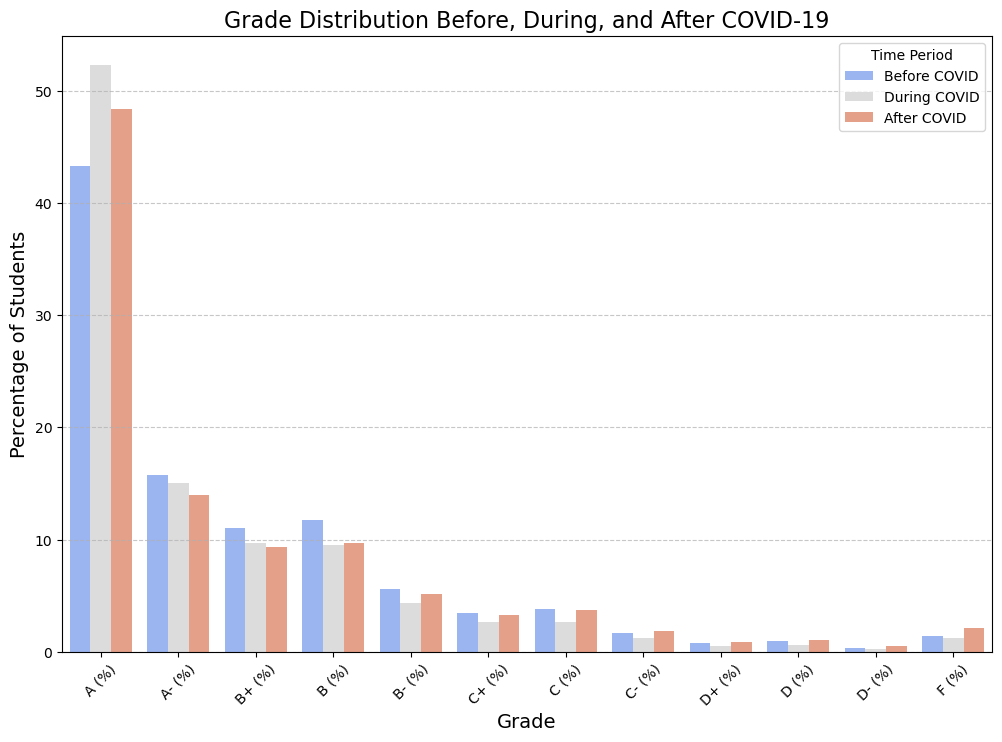

In [18]:
# Define the grade columns we want to analyze
grade_columns = ['A (%)', 'A- (%)', 'B+ (%)', 'B (%)', 'B- (%)', 'C+ (%)', 'C (%)', 'C- (%)', 
                 'D+ (%)', 'D (%)', 'D- (%)', 'F (%)']

# Calculate the average grade distribution for each time period
avg_grades_before = before_covid[grade_columns].mean()
avg_grades_during = during_covid[grade_columns].mean()
avg_grades_after = after_covid[grade_columns].mean()

# Create a DataFrame to store the grade distributions
grade_data = pd.DataFrame({
    'Grade': grade_columns,
    'Before COVID': avg_grades_before.values,
    'During COVID': avg_grades_during.values,
    'After COVID': avg_grades_after.values
})

# Melt the DataFrame for easier plotting
grade_data_melted = grade_data.melt(id_vars='Grade', var_name='Time Period', value_name='Percentage')

# Plot the grade distribution for each time period
plt.figure(figsize=(12, 8))
sns.barplot(x='Grade', y='Percentage', hue='Time Period', data=grade_data_melted, palette='coolwarm')

# Customize the plot
plt.title('Grade Distribution Before, During, and After COVID-19', fontsize=16)
plt.ylabel('Percentage of Students', fontsize=14)
plt.xlabel('Grade', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

## Analysis of Grade Distribution Before, During, and After COVID-19

The grade distribution chart shows clear shifts in student performance across the three time periods (before, during, and after COVID-19). Several key observations can be made:
- **A Grades:** The percentage of students receiving an A grade increased significantly during COVID-19, peaking at over 50%. This suggests that grading may have been more lenient during the pandemic, likely to accommodate the challenges of remote learning and other disruptions. After the pandemic, the percentage of A grades slightly decreased but still remained elevated compared to the pre-pandemic period.
- **Lower Grades:** There is a noticeable decrease in the percentage of students receiving lower grades (C, D, F) during the COVID-19 period. This supports the idea that grading policies may have been adjusted to mitigate the academic challenges students faced.
- **Post-Pandemic:** After the pandemic, we see a slight return to pre-pandemic grade distributions, but the percentage of A grades remains higher than before, while the percentage of failing or low grades (D, F) is still lower.

These shifts in grade distributions are indicative of how institutions adjusted to the unprecedented circumstances of the pandemic, prioritizing leniency and flexibility. However, the lingering higher percentages of A grades post-pandemic suggest that some of these changes may have had lasting effects on grading trends.

### Significance of Withdraw Rate Analysis

The withdraw rate is another important indicator of student challenges during these time periods. A higher withdraw rate may suggest that students struggled more with course content, especially during the disruptions caused by the pandemic. Conversely, a lower withdraw rate could indicate better support systems, flexibility in course structures, or alternative grading methods during and after the pandemic. By examining the withdraw rates across the three time periods, we can further explore how the academic environment was impacted by COVID-19.

### Next Step:
We will now calculate and visualize the withdraw rates for each of the three time periods (before, during, and after COVID-19) to assess how the pandemic affected students' decisions to withdraw from courses.

Average Withdraw Rate for each time period:


,Time Period,Average Withdraws
0,Before COVID,0.972577
1,During COVID,0.346060
2,After COVID,1.100887


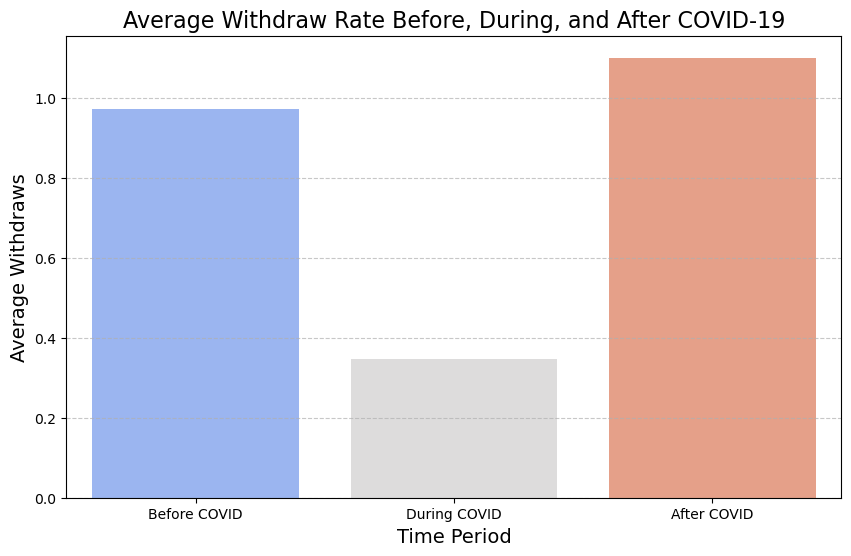

In [19]:
# Calculate the average withdraw rate for each time period
avg_withdraw_before = before_covid['Withdraws'].mean()
avg_withdraw_during = during_covid['Withdraws'].mean()
avg_withdraw_after = after_covid['Withdraws'].mean()

# Create a DataFrame to store the withdraw rate data
withdraw_data = pd.DataFrame({
    'Time Period': ['Before COVID', 'During COVID', 'After COVID'],
    'Average Withdraws': [avg_withdraw_before, avg_withdraw_during, avg_withdraw_after]
})

# Display the DataFrame to check the values
print("Average Withdraw Rate for each time period:")
display(withdraw_data)

# Plot the withdraw rates for the three time periods
plt.figure(figsize=(10, 6))
sns.barplot(x='Time Period', y='Average Withdraws', data=withdraw_data, palette='coolwarm')

# Customize the plot
plt.title('Average Withdraw Rate Before, During, and After COVID-19', fontsize=16)
plt.ylabel('Average Withdraws', fontsize=14)
plt.xlabel('Time Period', fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

## Analysis of Withdraw Rate Before, During, and After COVID-19

The withdraw rate graph highlights a clear trend across the three time periods:
- **Before COVID-19:** The average withdraw rate was approximately **0.97**, indicating that students were withdrawing from courses at a relatively steady rate prior to the pandemic.
- **During COVID-19:** Interestingly, the withdraw rate dropped significantly to **0.35** during the pandemic. This decrease could be attributed to the increased flexibility offered by universities, such as pass/fail options, relaxed grading standards, or extended deadlines, which may have encouraged students to complete their courses rather than withdraw.
- **After COVID-19:** The withdraw rate increased to **1.10**, exceeding pre-pandemic levels. This post-pandemic spike suggests that students may still be adjusting to the return to in-person or hybrid learning environments, or that lingering disruptions from the pandemic could be affecting their ability to complete courses successfully.

The changes in the withdraw rate provide valuable insights into student behavior during the pandemic, with the lower rate during COVID-19 suggesting that students were more likely to stay enrolled, perhaps due to the various accommodations made by institutions. The post-pandemic increase indicates that further support may be needed to help students adapt to the evolving academic environment.

### Significance of Average Enrollment Analysis

Next, we will examine the average enrollment in courses across the same three time periods. Enrollment trends provide important context for understanding how student participation in courses changed during the pandemic. A decline in enrollment during COVID-19 could indicate decreased student engagement or challenges in adapting to remote learning, while post-pandemic trends could highlight shifts in student interest or capacity for course participation.

### Next Step:
We will calculate and visualize the average enrollment across the three time periods to better understand the impact of the pandemic on student participation in courses.

Average Enrollment for each time period:


,Time Period,Average Enrollment
0,Before COVID,33.616528
1,During COVID,32.399588
2,After COVID,33.710212


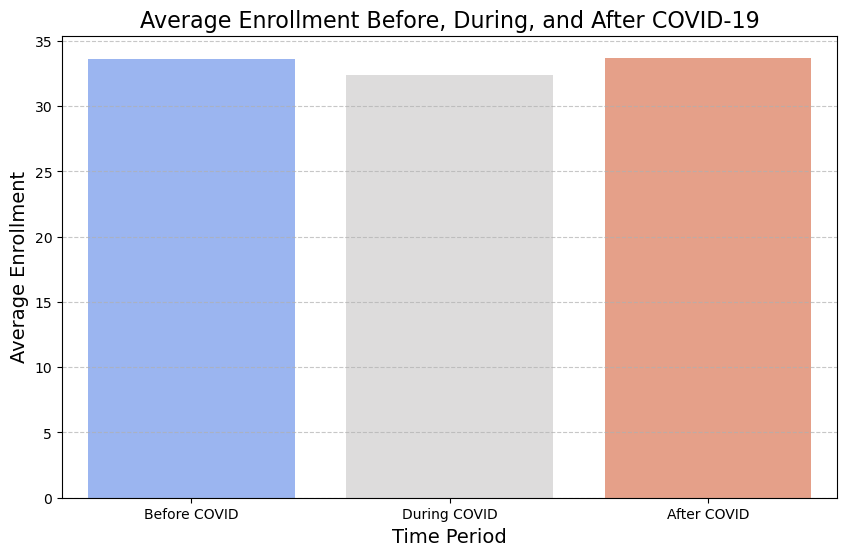

In [20]:
# Calculate the average enrollment for each time period
avg_enrollment_before = before_covid['Graded Enrollment'].mean()
avg_enrollment_during = during_covid['Graded Enrollment'].mean()
avg_enrollment_after = after_covid['Graded Enrollment'].mean()

# Create a DataFrame to store the average enrollment data
enrollment_data = pd.DataFrame({
    'Time Period': ['Before COVID', 'During COVID', 'After COVID'],
    'Average Enrollment': [avg_enrollment_before, avg_enrollment_during, avg_enrollment_after]
})

# Display the DataFrame to check the values
print("Average Enrollment for each time period:")
display(enrollment_data)

# Plot the average enrollment for the three time periods
plt.figure(figsize=(10, 6))
sns.barplot(x='Time Period', y='Average Enrollment', data=enrollment_data, palette='coolwarm')

# Customize the plot
plt.title('Average Enrollment Before, During, and After COVID-19', fontsize=16)
plt.ylabel('Average Enrollment', fontsize=14)
plt.xlabel('Time Period', fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

## Analysis of Average Enrollment Before, During, and After COVID-19

The average enrollment chart shows relatively stable participation in courses across the three time periods:
- **Before COVID-19:** The average course enrollment was **33.62** students per course, indicating a steady level of engagement before the pandemic.
- **During COVID-19:** There was a slight drop in average enrollment during the pandemic, decreasing to **32.40** students per course. This minor decline may reflect the challenges posed by remote learning, such as reduced engagement or capacity for online courses.
- **After COVID-19:** Post-pandemic, the average enrollment rebounded to **33.71**, surpassing pre-pandemic levels. This suggests that student participation in courses has largely returned to normal, with potential growth in certain areas.

Overall, the impact of COVID-19 on enrollment appears to be minimal, with only slight variations in average enrollment across the three periods. This indicates that, while the pandemic disrupted many aspects of academic life, student engagement in courses remained consistent.

### Significance of GPA Difference by Department

Next, we will analyze how GPA trends differed across departments by comparing the average GPA **during COVID-19** with the average GPA **before COVID-19**. This will help us identify departments that experienced significant shifts in grading trends during the pandemic, potentially reflecting the varying challenges faced by different fields of study in adapting to remote or hybrid learning environments.

### Next Step:
We will calculate the GPA difference (During COVID minus Before COVID) for each department and visualize the results to identify which departments saw the largest shifts in GPA during the pandemic.


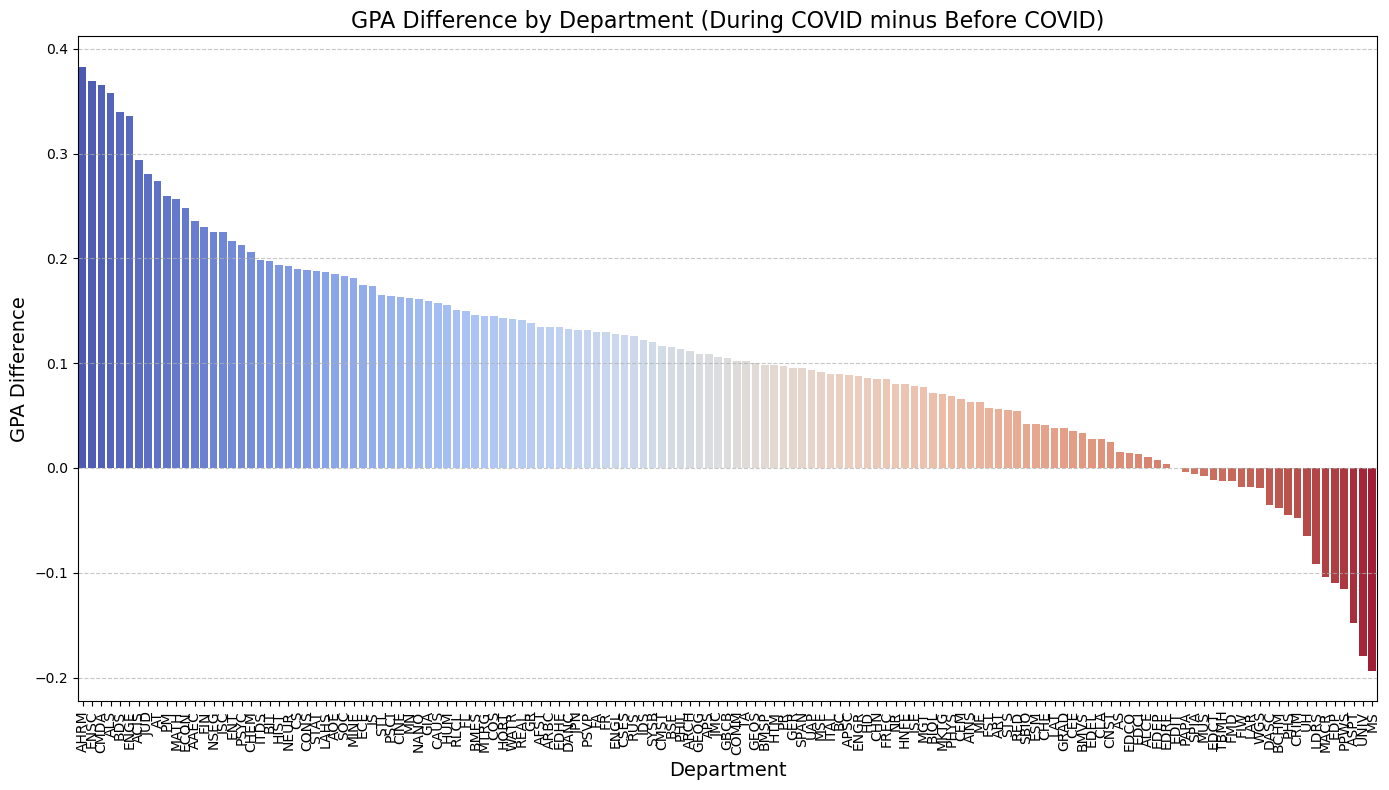

In [21]:
# Group the data by department and calculate the average GPA for each department
gpa_before_department = before_covid.groupby('Subject')['GPA'].mean()
gpa_during_department = during_covid.groupby('Subject')['GPA'].mean()

# Merge the two GPA Series into a DataFrame for comparison
gpa_diff = pd.DataFrame({
    'GPA Before COVID': gpa_before_department,
    'GPA During COVID': gpa_during_department
})

# Drop rows with NaN values (departments that don't have data for both periods)
gpa_diff.dropna(inplace=True)

# Calculate the GPA difference (During minus Before)
gpa_diff['GPA Difference'] = gpa_diff['GPA During COVID'] - gpa_diff['GPA Before COVID']

# Sort the departments by GPA difference
gpa_diff_sorted = gpa_diff.sort_values(by='GPA Difference', ascending=False)

# Plot the GPA differences for all departments
plt.figure(figsize=(14, 8))  # Adjust the figure size as necessary for better visibility
sns.barplot(x=gpa_diff_sorted.index, y='GPA Difference', data=gpa_diff_sorted, palette='coolwarm')

# Customize the plot
plt.title('GPA Difference by Department (During COVID minus Before COVID)', fontsize=16)
plt.ylabel('GPA Difference', fontsize=14)
plt.xlabel('Department', fontsize=14)
plt.xticks(rotation=90)  # Rotate the x-axis labels to fit all department names
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()

## Analysis of Overall GPA Differences (During COVID minus Before COVID)

The graph displaying GPA differences by department (During COVID minus Before COVID) reveals significant variation across the departments. Several key insights emerge:
- **Positive GPA Shifts:** Many departments saw an increase in GPA during the COVID-19 period, with some departments showing a difference of over **0.3** GPA points. These increases could be attributed to several factors, including the shift to online learning, more flexible grading policies, or adjustments in course difficulty due to the pandemic.
- **Negative GPA Shifts:** Conversely, some departments experienced a drop in GPA during the pandemic, with certain departments showing decreases of up to **0.2** GPA points. These declines could suggest that some subjects or fields of study faced more challenges adapting to remote instruction or that students found these courses more difficult to manage in a pandemic environment.

This overall analysis highlights the varied impact of the pandemic on academic performance across different fields of study. Some departments may have been more equipped to handle the transition to remote or hybrid learning, while others faced greater challenges, leading to fluctuations in student performance.

### Next Step:
To dive deeper, we will now focus on the departments with the most significant changes in GPA. Specifically, we will examine:
- **Top 10 Departments with the Largest GPA Increases:** These departments experienced the most significant positive shifts in GPA during the pandemic.
- **Top 10 Departments with the Largest GPA Decreases:** These departments saw the most substantial GPA declines, indicating potential areas where students may have struggled more during COVID-19.

By identifying these departments, we can gain more granular insights into how different fields of study were affected by the pandemic and potentially identify patterns related to course content, teaching methodology, or student engagement.


Top 10 Departments with the Largest GPA Increase (During minus Before COVID):


,GPA Before COVID,GPA During COVID,GPA Difference
Subject,,,
AHRM,3.325145,3.708125,0.382980
ENSC,3.177581,3.547083,0.369503
CMDA,3.014643,3.379623,0.364980
ALS,3.189307,3.547447,0.358140
BDS,3.100000,3.440000,0.340000
ENGE,3.348374,3.683788,0.335413
ACIS,3.052000,3.345872,0.293872
JUD,3.220000,3.500000,0.280000
AT,2.856266,3.129747,0.273481


Top 10 Departments with the Largest GPA Decrease (During minus Before COVID):


,GPA Before COVID,GPA During COVID,GPA Difference
Subject,,,
PHS,3.904654,3.860175,-0.044479
CRIM,3.513492,3.465556,-0.047937
UH,3.943465,3.878281,-0.065183
LDRS,3.822623,3.730606,-0.092017
MACR,3.726154,3.622500,-0.103654
EDP,4.000000,3.890000,-0.110000
PPWS,3.619630,3.503750,-0.115880
ASPT,3.812400,3.664286,-0.148114
UNIV,3.614261,3.435313,-0.178948


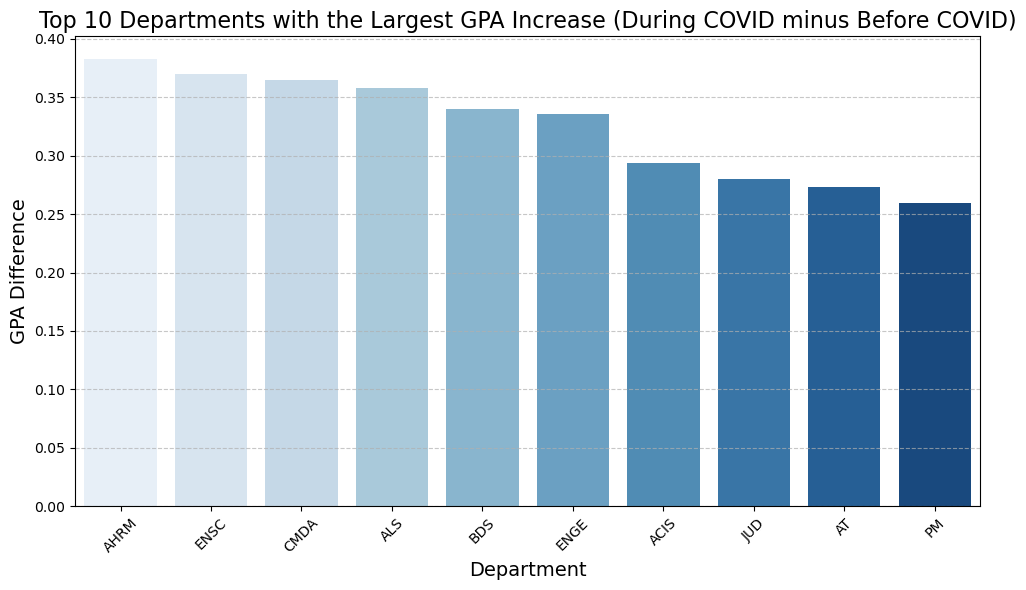

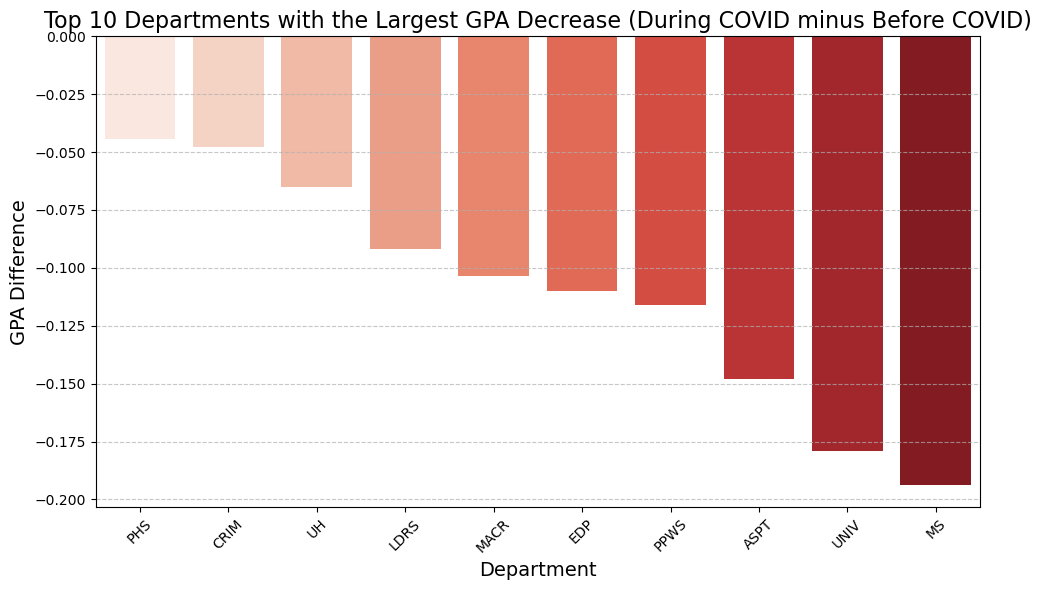

In [22]:
# Get the top 10 departments with the largest GPA increases
top_10_increased = gpa_diff_sorted.head(10)

# Get the top 10 departments with the largest GPA decreases
top_10_decreased = gpa_diff_sorted.tail(10)

# Display the DataFrames for both top 10 increased and decreased departments
print("\nTop 10 Departments with the Largest GPA Increase (During minus Before COVID):")
display(top_10_increased)

print("Top 10 Departments with the Largest GPA Decrease (During minus Before COVID):")
display(top_10_decreased)

# Plot the top 10 increased GPA departments
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_increased.index, y='GPA Difference', data=top_10_increased, palette='Blues')

# Customize the plot
plt.title('Top 10 Departments with the Largest GPA Increase (During COVID minus Before COVID)', fontsize=16)
plt.ylabel('GPA Difference', fontsize=14)
plt.xlabel('Department', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot the top 10 decreased GPA departments
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_decreased.index, y='GPA Difference', data=top_10_decreased, palette='Reds')

# Customize the plot
plt.title('Top 10 Departments with the Largest GPA Decrease (During COVID minus Before COVID)', fontsize=16)
plt.ylabel('GPA Difference', fontsize=14)
plt.xlabel('Department', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Analysis of Top 10 Departments with the Largest GPA Increases and Decreases (During COVID minus Before COVID)

The bar charts above highlight the departments with the most significant changes in GPA during the COVID-19 period:

### Largest GPA Increases:
- The top 10 departments with the largest GPA increases during COVID-19 show substantial gains, with differences ranging from **+0.26 to +0.38 GPA points**. Departments such as **AHRM, ENSC, and CMDA** saw the largest positive shifts. These increases may indicate that these departments were able to adapt to remote learning more effectively or offered more lenient grading during the pandemic.
- A significant GPA increase could also suggest that the coursework became more accessible, students had more flexible schedules, or grading standards were relaxed due to the challenges posed by the pandemic.

### Largest GPA Decreases:
- On the other hand, departments like **MS, UNIV, and ASPT** experienced the most notable GPA decreases, with drops ranging from **-0.19 to -0.04 GPA points**. This suggests that students may have struggled more in these departments during the transition to online learning, or the nature of these courses may have been less conducive to the remote format.
- These GPA decreases may reflect greater challenges in maintaining academic performance in certain fields of study, particularly in courses that might require hands-on learning or interactive environments, which could have been more difficult to replicate online.

These insights reveal that while some departments flourished during the pandemic, others faced significant challenges, leading to substantial differences in student performance across the university.

## Next Step: Overall GPA Differences by Department (After COVID minus Before COVID)

While it’s important to understand how GPAs shifted during the pandemic, it’s equally crucial to assess whether these changes were temporary or if they had lasting impacts. By comparing GPA differences **after COVID** to **before COVID**, we can observe if departments returned to their pre-pandemic grading standards or if new trends have emerged.

This analysis will help us understand:
- **Did departments that saw GPA increases during COVID maintain higher GPAs after the pandemic?**
- **Were there departments that experienced decreases during the pandemic and struggled to recover afterward?**
- **Are there any lasting effects on grading standards post-pandemic?**

This comparison will provide valuable insights into whether the changes in academic performance during COVID were sustained or whether departments have normalized back to pre-pandemic patterns.

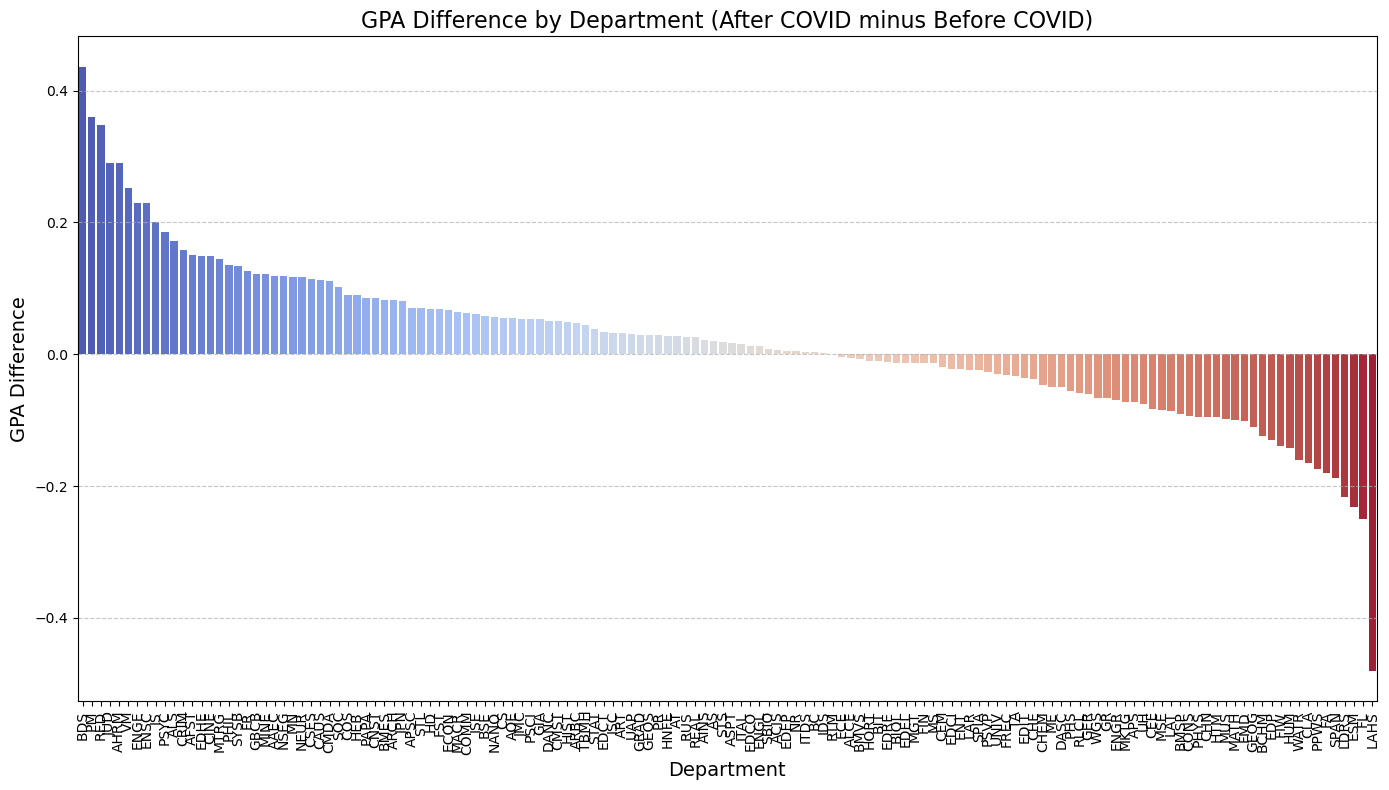

In [23]:
# Group the data by department and calculate the average GPA for each department
gpa_before_department = before_covid.groupby('Subject')['GPA'].mean()
gpa_after_department = after_covid.groupby('Subject')['GPA'].mean()

# Merge the two GPA Series into a DataFrame for comparison
gpa_diff_after = pd.DataFrame({
    'GPA Before COVID': gpa_before_department,
    'GPA After COVID': gpa_after_department
})

# Drop rows with NaN values (departments that don't have data for both periods)
gpa_diff_after.dropna(inplace=True)

# Calculate the GPA difference (After minus Before)
gpa_diff_after['GPA Difference'] = gpa_diff_after['GPA After COVID'] - gpa_diff_after['GPA Before COVID']

# Sort the departments by GPA difference
gpa_diff_after_sorted = gpa_diff_after.sort_values(by='GPA Difference', ascending=False)

# Plot the GPA differences for all departments
plt.figure(figsize=(14, 8))  # Adjust the figure size for better visibility
sns.barplot(x=gpa_diff_after_sorted.index, y='GPA Difference', data=gpa_diff_after_sorted, palette='coolwarm')

# Customize the plot
plt.title('GPA Difference by Department (After COVID minus Before COVID)', fontsize=16)
plt.ylabel('GPA Difference', fontsize=14)
plt.xlabel('Department', fontsize=14)
plt.xticks(rotation=90)  # Rotate the x-axis labels to fit all department names
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()  # Adjust layout to

## Analysis of Overall GPA Differences by Department (After COVID minus Before COVID)

The graph displaying the GPA differences by department after COVID compared to before COVID reveals important trends about how departments adjusted to post-pandemic conditions. These shifts in GPA highlight the long-term effects of the pandemic on student performance and grading practices.

### Key Observations:
- **Positive GPA Shifts:** A number of departments experienced **positive GPA differences**, with some seeing increases as high as **0.4 GPA points**. These departments may have benefited from changes implemented during the pandemic that carried over post-pandemic, such as more flexible grading, hybrid learning opportunities, or adjusted course content. 
- **Negative GPA Shifts:** On the other end, several departments experienced **negative GPA differences**, with some departments showing decreases of **-0.4 GPA points** or more. These declines could indicate that some fields were more impacted by the pandemic’s disruptions and have not fully recovered. It might also suggest that the return to in-person learning brought new challenges, or that departments struggled to maintain pre-pandemic grading standards.

This analysis suggests that the pandemic's impact on academic performance has had **lasting effects** on some departments. The shifts in GPA may reflect deeper changes in teaching methodologies, student engagement, and the overall learning environment that are still influencing student outcomes.

## Next Step: Analyzing Top 10 GPA Increases and Decreases (After minus Before COVID)

While the overall analysis shows broad trends across departments, focusing on the **Top 10 most increased and decreased GPA departments** provides a more detailed view of the extremes. Understanding these departments can reveal:
- **Which departments have continued to excel post-pandemic,** adapting effectively and improving student outcomes.
- **Which departments are facing ongoing challenges,** potentially needing further support to stabilize student performance.

By examining the departments with the most significant changes, we can identify areas of success and concern, offering insights into how to prioritize resources and initiatives for post-pandemic recovery in education. 


Top 10 Departments with the Largest GPA Increase (After minus Before COVID):


,GPA Before COVID,GPA After COVID,GPA Difference
Subject,,,
BDS,3.100000,3.536667,0.436667
PM,2.937143,3.296842,0.359699
RED,3.215789,3.563913,0.348124
JUD,3.220000,3.510000,0.290000
AHRM,3.325145,3.615000,0.289855
VM,3.483060,3.735000,0.251940
ENGE,3.348374,3.578519,0.230144
ENSC,3.177581,3.407692,0.230112
IS,3.383723,3.585036,0.201314


Top 10 Departments with the Largest GPA Decrease (After minus Before COVID):


,GPA Before COVID,GPA After COVID,GPA Difference
Subject,,,
HUM,3.566714,3.424074,-0.142640
WATR,3.330000,3.170000,-0.160000
CLA,3.416429,3.252000,-0.164429
PPWS,3.619630,3.445625,-0.174005
FA,3.613333,3.433333,-0.180000
SPAN,3.498689,3.311345,-0.187344
LDRS,3.822623,3.606216,-0.216407
ESM,3.096901,2.864464,-0.232437
FL,3.760000,3.510000,-0.250000


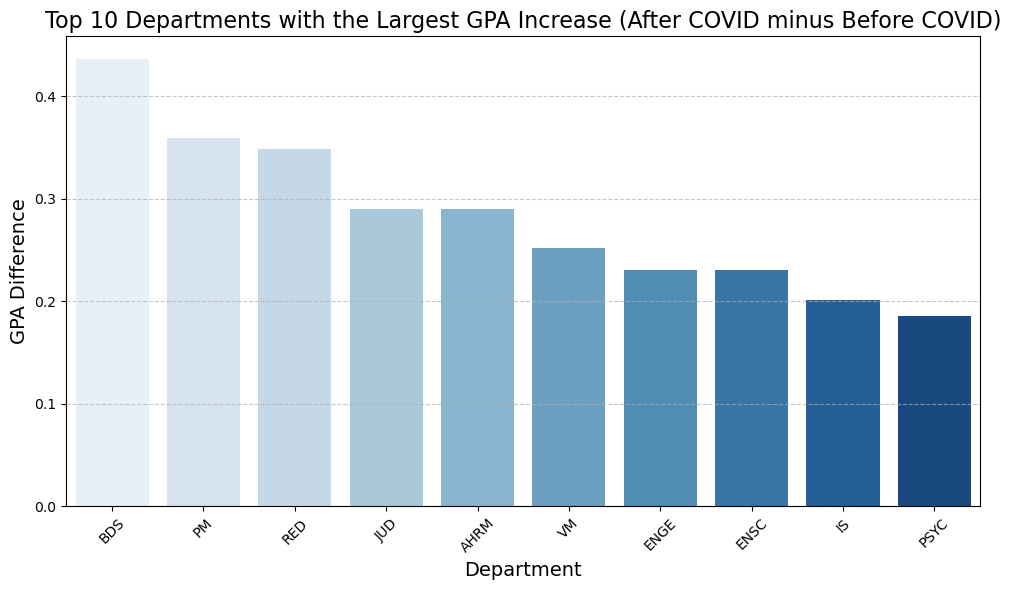

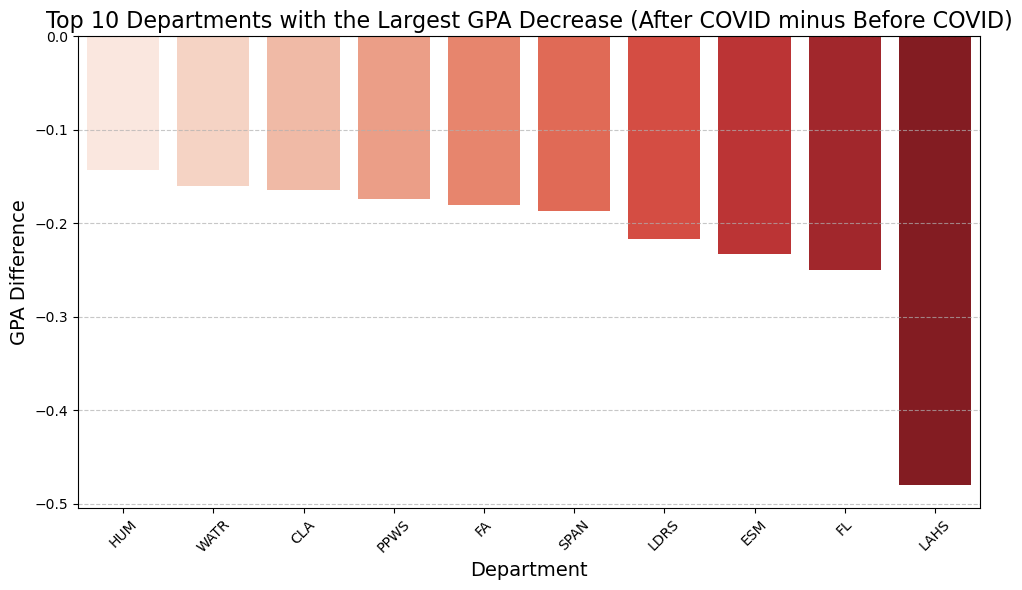

In [24]:
# Get the top 10 departments with the largest GPA increases
top_10_increased_after = gpa_diff_after_sorted.head(10)

# Get the top 10 departments with the largest GPA decreases
top_10_decreased_after = gpa_diff_after_sorted.tail(10)

# Display the DataFrames for both top 10 increased and decreased departments
print("\nTop 10 Departments with the Largest GPA Increase (After minus Before COVID):")
display(top_10_increased_after)

print("Top 10 Departments with the Largest GPA Decrease (After minus Before COVID):")
display(top_10_decreased_after)

# Plot the top 10 increased GPA departments
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_increased_after.index, y='GPA Difference', data=top_10_increased_after, palette='Blues')

# Customize the plot
plt.title('Top 10 Departments with the Largest GPA Increase (After COVID minus Before COVID)', fontsize=16)
plt.ylabel('GPA Difference', fontsize=14)
plt.xlabel('Department', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot the top 10 decreased GPA departments
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_decreased_after.index, y='GPA Difference', data=top_10_decreased_after, palette='Reds')

# Customize the plot
plt.title('Top 10 Departments with the Largest GPA Decrease (After COVID minus Before COVID)', fontsize=16)
plt.ylabel('GPA Difference', fontsize=14)
plt.xlabel('Department', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Analysis of Top 10 Departments with the Largest GPA Increases and Decreases (After minus Before COVID)

### Largest GPA Increases:
- The departments with the most significant GPA increases after COVID compared to before COVID show substantial improvement. The **BDS** department, for example, saw a GPA increase of **+0.43**, followed by **PM** and **RED**, both with GPA increases of over **+0.35**. These large GPA improvements suggest that these departments may have adapted exceptionally well to post-pandemic teaching methods or course structure changes.
- The reasons behind such increases could include enhanced student support systems, more flexible course structures, or an ongoing shift in grading standards.

### Largest GPA Decreases:
- In contrast, the departments with the largest GPA decreases experienced notable declines. **LAHS** stands out with a GPA drop of **-0.48**, followed by **FL** and **ESM**, which both had decreases of over **-0.25**. Such GPA declines suggest that these departments may still be grappling with challenges post-pandemic, whether in terms of maintaining student engagement, adjusting to new teaching environments, or facing ongoing disruptions to course content and delivery.
- The decline in GPA across these departments may also indicate areas where additional academic support or adjustments to teaching strategies could be needed to help students succeed.

## Next Step: GPA Differences by Course (During COVID minus Before COVID)

While we’ve explored GPA differences at the department level, a more granular look at **course-level GPA differences** provides further insights. Understanding which courses saw the largest shifts in GPA during COVID (compared to before COVID) can help us identify specific academic areas where students either thrived or struggled the most.

Given the large number of unique courses, a histogram is a useful way to visualize the distribution of GPA differences across all courses. This will give us a clearer picture of how GPA trends varied across individual classes and whether these trends were concentrated in particular courses or spread more evenly across the curriculum.

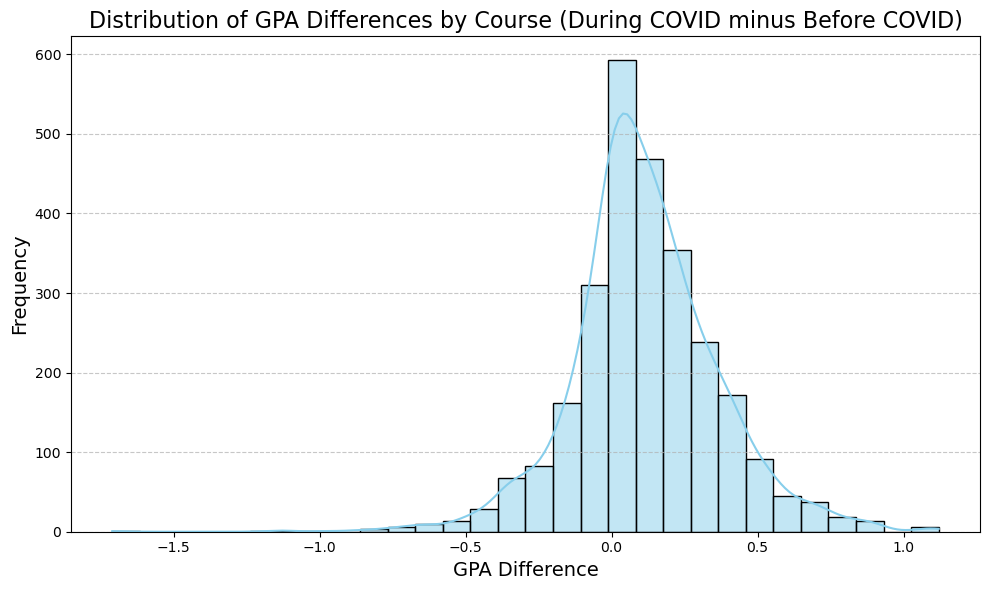

In [25]:
# Group the data by course and calculate the average GPA for each course
gpa_before_course = before_covid.groupby('Course Title')['GPA'].mean()
gpa_during_course = during_covid.groupby('Course Title')['GPA'].mean()

# Merge the two GPA Series into a DataFrame for comparison
gpa_diff_course = pd.DataFrame({
    'GPA Before COVID': gpa_before_course,
    'GPA During COVID': gpa_during_course
})

# Drop rows with NaN values (courses that don't have data for both periods)
gpa_diff_course.dropna(inplace=True)

# Calculate the GPA difference (During minus Before)
gpa_diff_course['GPA Difference'] = gpa_diff_course['GPA During COVID'] - gpa_diff_course['GPA Before COVID']

# Plot a histogram of GPA differences by course
plt.figure(figsize=(10, 6))
sns.histplot(gpa_diff_course['GPA Difference'], kde=True, bins=30, color='skyblue')

# Customize the plot
plt.title('Distribution of GPA Differences by Course (During COVID minus Before COVID)', fontsize=16)
plt.xlabel('GPA Difference', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the histogram
plt.show()

## Analysis of the Distribution of GPA Differences by Course (During COVID minus Before COVID)

The histogram of GPA differences across individual courses provides a clear overview of how grading shifted during the pandemic. The distribution is mostly centered around **0 GPA difference**, meaning that for many courses, grading standards remained fairly consistent before and during COVID-19. However, there is a noticeable spread in both directions, indicating that some courses saw significant increases or decreases in GPA during the pandemic.

### Key Observations:
- **Left Tail (Negative GPA Differences):** A small portion of courses experienced notable decreases in GPA, which could indicate that students struggled with adapting to remote learning or that the courses were particularly difficult to transition online.
- **Right Tail (Positive GPA Differences):** On the other hand, some courses saw increases in GPA during the pandemic, potentially due to more lenient grading policies or other factors such as open-book exams or flexible deadlines.
- **Center Peak:** The majority of courses, however, show minimal GPA differences, indicating that the shift to online learning had a neutral effect on grading for these courses.

This distribution suggests that while many courses were able to maintain consistent academic standards during the pandemic, some courses saw notable changes—both positive and negative.

## Next Step: Analyzing Top 10 GPA Increases and Decreases by Course

While the histogram gives us a broad view of GPA changes, it’s important to examine **specific courses** that experienced the most significant shifts. By analyzing the **Top 10 courses with the largest GPA increases and decreases**, we can identify:
- **Which courses benefited from the pandemic conditions,** possibly due to adjusted grading policies or easier remote formats.
- **Which courses faced the greatest challenges,** where students may have struggled to adapt or where course formats didn’t transition well online.

Focusing on these courses can provide actionable insights for improving course design, grading practices, and student support in future situations that disrupt normal teaching methods.


Top 10 Courses with the Largest GPA Increase (During minus Before COVID):


,GPA Before COVID,GPA During COVID,GPA Difference
Course Title,,,
Fluid Mechanics,2.840000,3.9600,1.120000
Exper for Ocean Vehicle Design,2.310000,3.4160,1.106000
TS: Game Design,2.555000,3.6600,1.105000
Ath Fld Prac- Base/Softball,2.623333,3.7050,1.081667
Epistemology,2.640000,3.7200,1.080000
Physiology of Reproduction Lab,2.932000,4.0000,1.068000
Human Security,2.932500,3.8625,0.930000
Principles of Robotics Systems,2.583333,3.4900,0.906667
Rural Regional Dvlp Policy,2.688000,3.5900,0.902000


Top 10 Courses with the Largest GPA Decrease (During minus Before COVID):


,GPA Before COVID,GPA During COVID,GPA Difference
Course Title,,,
Sr Sem Intl Relations,3.830000,2.120000,-1.710000
Rhetoric in Society,3.990000,2.840000,-1.150000
Professnl Dvlpmnt Seminar ESM,3.450000,2.330000,-1.120000
Livestock Evaluation,3.694000,2.720000,-0.974000
Internatl Development,3.584444,2.726667,-0.857778
"Fit, Patternmaking, & Draping",3.926667,3.070000,-0.856667
Spanish for the Green Industry,3.660833,2.860000,-0.800833
Stability of Structures,3.920000,3.160000,-0.760000
TS: Human Centered Design,4.000000,3.240000,-0.760000


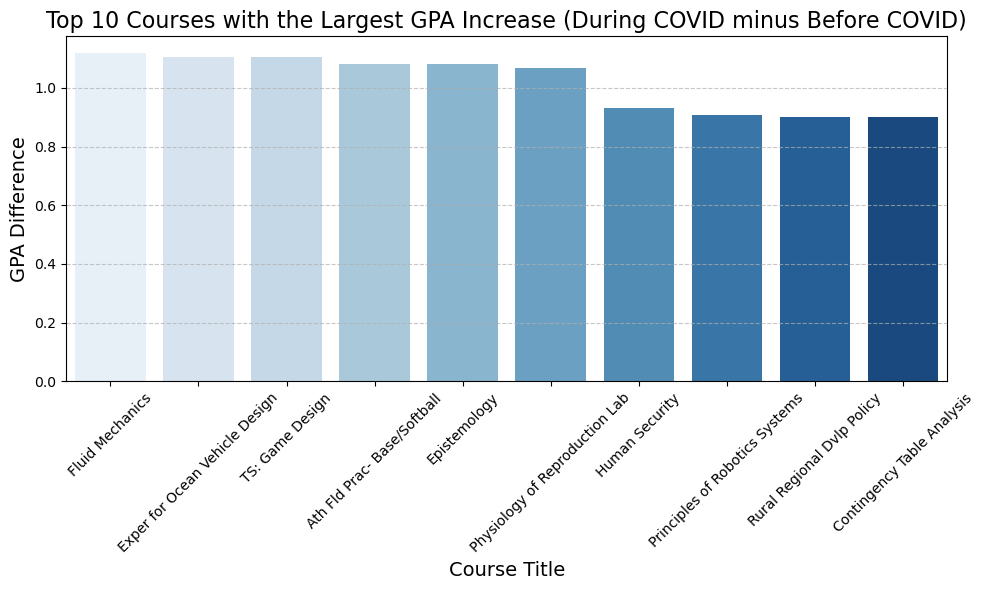

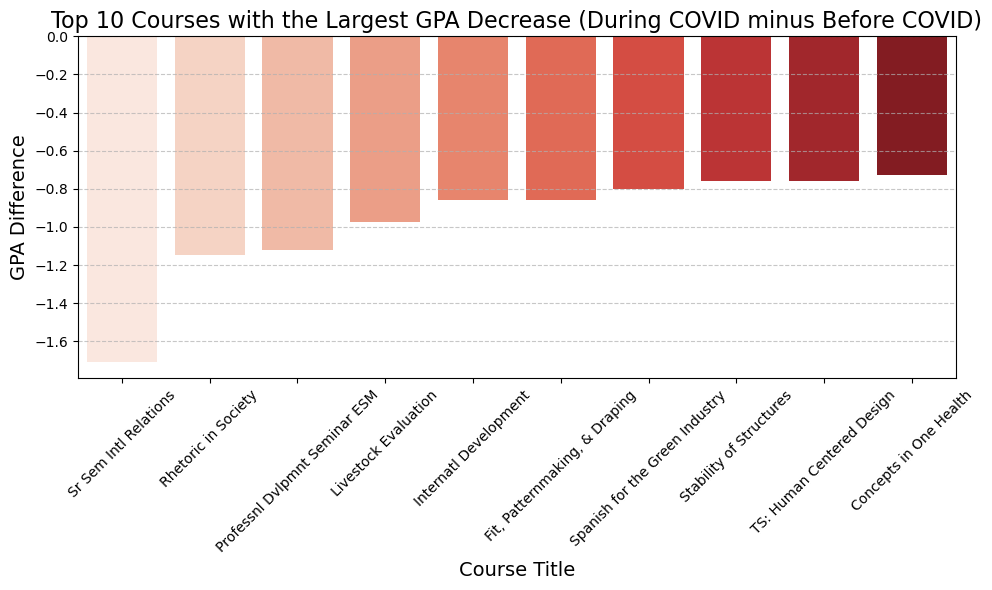

In [26]:
# Group the data by course title instead of course number and calculate the average GPA for each course
gpa_before_course_title = before_covid.groupby('Course Title')['GPA'].mean()
gpa_during_course_title = during_covid.groupby('Course Title')['GPA'].mean()

# Merge the two GPA Series into a DataFrame for comparison
gpa_diff_course_title = pd.DataFrame({
    'GPA Before COVID': gpa_before_course_title,
    'GPA During COVID': gpa_during_course_title
})

# Drop rows with NaN values (courses that don't have data for both periods)
gpa_diff_course_title.dropna(inplace=True)

# Calculate the GPA difference (During minus Before)
gpa_diff_course_title['GPA Difference'] = gpa_diff_course_title['GPA During COVID'] - gpa_diff_course_title['GPA Before COVID']

# Get the top 10 courses with the largest GPA increases
top_10_increased_courses = gpa_diff_course_title.sort_values(by='GPA Difference', ascending=False).head(10)

# Get the top 10 courses with the largest GPA decreases
top_10_decreased_courses = gpa_diff_course_title.sort_values(by='GPA Difference', ascending=True).head(10)

# Display the DataFrames for both top 10 increased and decreased courses
print("\nTop 10 Courses with the Largest GPA Increase (During minus Before COVID):")
display(top_10_increased_courses)

print("Top 10 Courses with the Largest GPA Decrease (During minus Before COVID):")
display(top_10_decreased_courses)

# Plot the top 10 increased GPA courses
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_increased_courses.index, y='GPA Difference', data=top_10_increased_courses, palette='Blues')

# Customize the plot
plt.title('Top 10 Courses with the Largest GPA Increase (During COVID minus Before COVID)', fontsize=16)
plt.ylabel('GPA Difference', fontsize=14)
plt.xlabel('Course Title', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot the top 10 decreased GPA courses
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_decreased_courses.index, y='GPA Difference', data=top_10_decreased_courses, palette='Reds')

# Customize the plot
plt.title('Top 10 Courses with the Largest GPA Decrease (During COVID minus Before COVID)', fontsize=16)
plt.ylabel('GPA Difference', fontsize=14)
plt.xlabel('Course Title', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Analysis of Top 10 GPA Increases and Decreases by Course (During minus Before COVID)

### Largest GPA Increases:
- Courses like **Fluid Mechanics** and **Experimental Ocean Vehicle Design** experienced the most significant GPA increases, with differences of **+1.12** and **+1.11** respectively. These large increases suggest that students performed significantly better during the pandemic in these courses compared to pre-pandemic times.
- A potential explanation could be the shift to online or hybrid learning, which may have favored certain practical or hands-on courses where grading may have been more lenient or flexible during COVID.

### Largest GPA Decreases:
- On the other end, **Sr Sem International Relations** experienced the most dramatic GPA decrease, with a drop of **-1.71**. Other courses like **Rhetoric in Society** and **Professional Development Seminar ESM** also saw considerable GPA declines, exceeding **-1.0 GPA**.
- These decreases might indicate courses where the transition to remote learning was challenging, or where students faced more difficulty engaging with or succeeding in course material under the pandemic's altered circumstances.

This contrast between GPA increases and decreases at the course level highlights how individual courses were affected differently based on content, teaching style, or assessment methods during COVID. 


## Next Step: Distribution of GPA Differences by Course (After minus Before COVID)

While the previous analysis provided insights into GPA changes during COVID compared to before, it’s equally important to assess the long-term effects of the pandemic by examining **GPA differences after COVID** compared to the pre-pandemic period. By analyzing the distribution of GPA differences across courses for the post-pandemic period, we can identify whether grading patterns returned to normal or if permanent shifts occurred in certain courses.


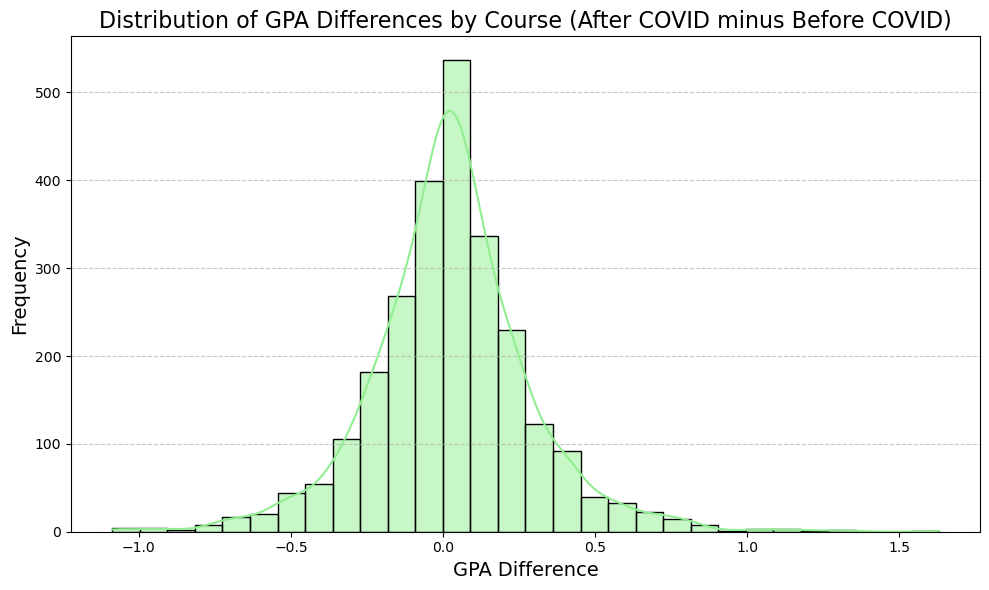

In [27]:
# Group the data by course title and calculate the average GPA for each course (after COVID)
gpa_after_course_title = after_covid.groupby('Course Title')['GPA'].mean()

# Merge the before and after GPA Series into a DataFrame for comparison
gpa_diff_course_after = pd.DataFrame({
    'GPA Before COVID': gpa_before_course_title,
    'GPA After COVID': gpa_after_course_title
})

# Drop rows with NaN values (courses that don't have data for both periods)
gpa_diff_course_after.dropna(inplace=True)

# Calculate the GPA difference (After minus Before COVID)
gpa_diff_course_after['GPA Difference'] = gpa_diff_course_after['GPA After COVID'] - gpa_diff_course_after['GPA Before COVID']

# Plot a histogram of GPA differences by course (After minus Before COVID)
plt.figure(figsize=(10, 6))
sns.histplot(gpa_diff_course_after['GPA Difference'], kde=True, bins=30, color='lightgreen')

# Customize the plot
plt.title('Distribution of GPA Differences by Course (After COVID minus Before COVID)', fontsize=16)
plt.xlabel('GPA Difference', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the histogram
plt.show()

## Analysis of Distribution of GPA Differences by Course (After COVID minus Before COVID)

This histogram shows the distribution of GPA differences across courses when comparing the **post-COVID period** to the **pre-COVID period**. The curve follows a **normal distribution pattern**, centered around a GPA difference of **0**. This suggests that for most courses, grading practices have largely returned to their pre-pandemic norms.

### Key Observations:
- **Right Tail (Positive GPA Differences):** Some courses experienced increases in GPA post-COVID, possibly due to more lenient or adjusted grading methods continuing after the pandemic.
- **Left Tail (Negative GPA Differences):** A smaller number of courses show a decrease in GPA after COVID, suggesting that some instructors may have returned to more stringent grading standards or that students faced challenges adapting back to in-person learning environments.

Overall, the distribution demonstrates a return to normal grading patterns for the majority of courses, with some lingering effects—both positive and negative—on certain courses.

## Next Step: Top 10 GPA Increases and Decreases by Course (After minus Before COVID)

While the distribution provides a broad overview of GPA changes across all courses, it’s important to identify **specific courses** that saw the most significant shifts in GPA. By analyzing the **Top 10 courses with the largest GPA increases and decreases**, we can uncover insights into which courses may have permanently shifted due to the pandemic and which ones returned to stricter or more lenient grading practices.


Top 10 Courses with the Largest GPA Increase (After minus Before COVID):


,GPA Before COVID,GPA After COVID,GPA Difference
Course Title,,,
Intermed Data Analytics & Ml,2.370000,4.000000,1.630000
Ath Fld Prac- Base/Softball,2.623333,3.960000,1.336667
Lab in Adv Learn,2.500000,3.795000,1.295000
Ath Fld Prac- Football/Soccer,2.770000,4.000000,1.230000
Intermediate Differential Equa,2.640000,3.800000,1.160000
Int Topics in Math Modeling,2.270000,3.400000,1.130000
Exper for Ocean Vehicle Design,2.310000,3.412857,1.102857
DSP & Filter Design,2.777500,3.820000,1.042500
Intro to Space Systems,2.960000,4.000000,1.040000


Top 10 Courses with the Largest GPA Decrease (After minus Before COVID):


,GPA Before COVID,GPA After COVID,GPA Difference
Course Title,,,
Const Means & Methods,3.450000,2.3625,-1.087500
Topics Multimedia Journalism,3.885000,2.8100,-1.075000
Space Weather,3.800000,2.7300,-1.070000
Intro to Fluid Mechanics,3.903333,2.8600,-1.043333
Spacecraft Propulsion,3.520000,2.5500,-0.970000
Industrial Automation,3.662500,2.7000,-0.962500
Alt Compl Nutrition Therapies,3.417500,2.4800,-0.937500
Comp Bio & Bioinfo Capstone,3.890000,2.9800,-0.910000
Class Applied Strings,3.940000,3.0500,-0.890000


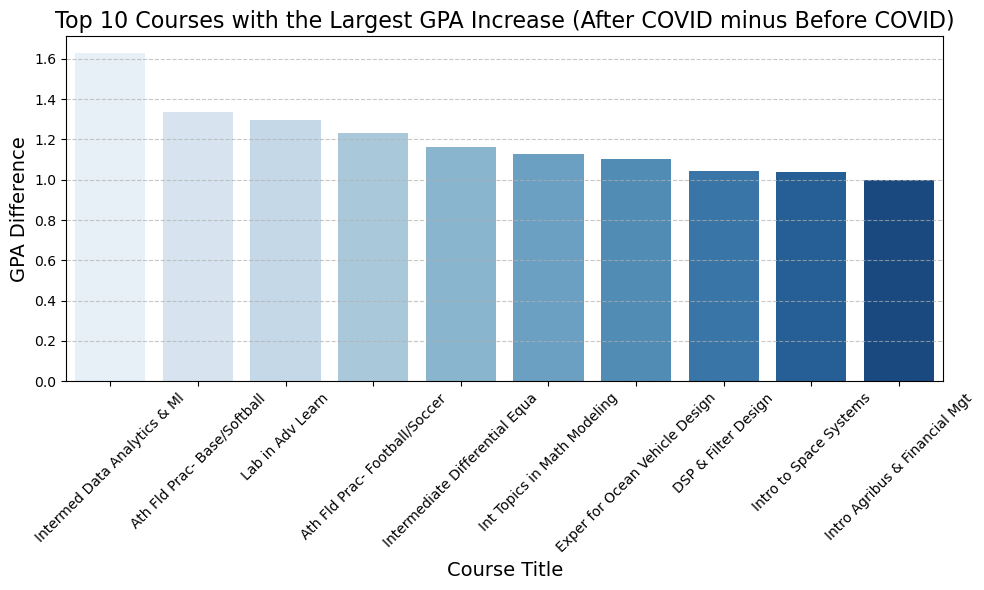

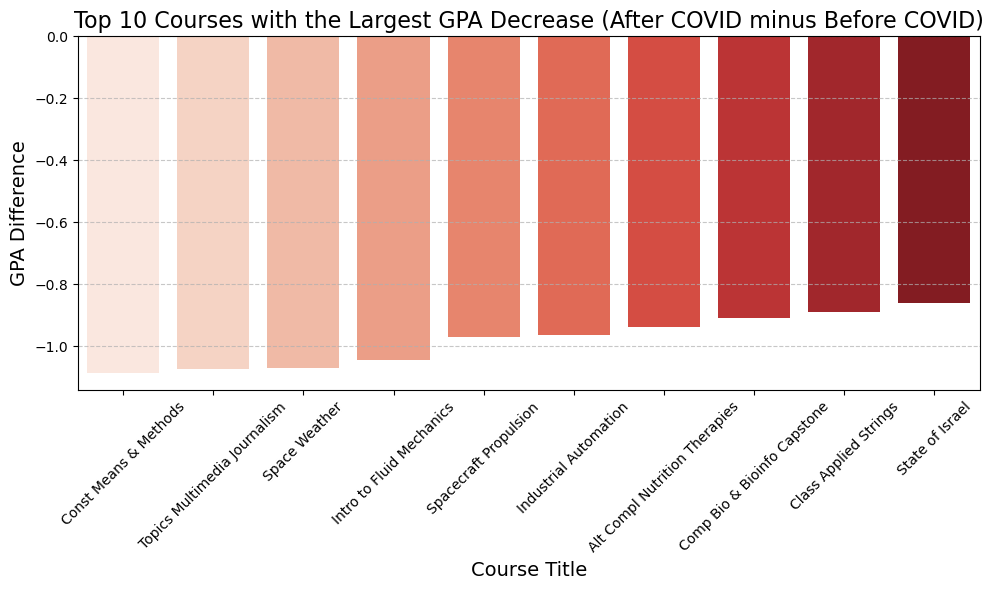

In [28]:
# Get the top 10 courses with the largest GPA increases (After minus Before COVID)
top_10_increased_courses_after = gpa_diff_course_after.sort_values(by='GPA Difference', ascending=False).head(10)

# Get the top 10 courses with the largest GPA decreases (After minus Before COVID)
top_10_decreased_courses_after = gpa_diff_course_after.sort_values(by='GPA Difference', ascending=True).head(10)

# Display the DataFrames for both top 10 increased and decreased courses
print("\nTop 10 Courses with the Largest GPA Increase (After minus Before COVID):")
display(top_10_increased_courses_after)

print("Top 10 Courses with the Largest GPA Decrease (After minus Before COVID):")
display(top_10_decreased_courses_after)

# Plot the top 10 increased GPA courses
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_increased_courses_after.index, y='GPA Difference', data=top_10_increased_courses_after, palette='Blues')

# Customize the plot
plt.title('Top 10 Courses with the Largest GPA Increase (After COVID minus Before COVID)', fontsize=16)
plt.ylabel('GPA Difference', fontsize=14)
plt.xlabel('Course Title', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot the top 10 decreased GPA courses
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_decreased_courses_after.index, y='GPA Difference', data=top_10_decreased_courses_after, palette='Reds')

# Customize the plot
plt.title('Top 10 Courses with the Largest GPA Decrease (After COVID minus Before COVID)', fontsize=16)
plt.ylabel('GPA Difference', fontsize=14)
plt.xlabel('Course Title', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Analysis of Top 10 GPA Increases and Decreases by Course (After COVID minus Before COVID)

This analysis highlights the **top 10 courses** with the most significant changes in GPA post-COVID compared to pre-COVID, both for increases and decreases.

### Key Observations:

#### GPA Increases:
- **Intermed Data Analytics & MI** had the largest GPA increase of 1.63. This could be attributed to changes in the course structure, instructional methods, or possibly leniency in grading after the pandemic.
- Courses such as **Ath Fld Prac (Base/Softball)** and **Lab in Adv Learn** also experienced over 1.2 GPA point increases, suggesting major shifts in how these courses were administered post-pandemic.
- Other courses like **Exper for Ocean Vehicle Design** and **Intro to Space Systems** also show significant positive changes in GPA, indicating some flexibility or improvement in teaching methods for these hands-on, technical courses.

#### GPA Decreases:
- On the other end, courses like **Const Means & Methods** and **Topics in Multimedia Journalism** showed significant decreases in GPA, with a decline of over 1.0 GPA points. This could indicate a return to more stringent grading or increased difficulty in course content.
- **Space Weather** and **Intro to Fluid Mechanics** were among other courses that faced GPA reductions, suggesting these fields may have experienced more rigid grading or more complex coursework post-COVID.
  
### Interpretation:
- **GPA Increases** could indicate courses where instructors may have continued to employ more lenient grading strategies post-COVID or where students adapted well to new learning environments.
- **GPA Decreases** may reflect areas where instructors returned to pre-pandemic grading norms or where students faced challenges adjusting back to more traditional coursework.

Overall, the pandemic clearly had diverse effects on grading across different courses. Some courses adjusted to more lenient grading, while others tightened their standards post-COVID.

## Overall Conclusion

The analysis of course data before, during, and after the COVID-19 pandemic reveals significant shifts in student performance, grading trends, and course outcomes. The pandemic's impact is evident across multiple dimensions, from overall GPA averages to specific course and department-level differences.

### Key Findings:

1. **GPA Trends**:
   - During COVID, average GPAs increased significantly, likely due to lenient grading policies, adjustments in teaching methods, and the shift to online learning. However, post-COVID GPAs returned to levels similar to pre-pandemic times, suggesting a normalization of grading practices.

2. **Grade Distributions**:
   - The distribution of grades showed a clear increase in the percentage of A's awarded during the pandemic, further supporting the hypothesis of lenient grading during this period. After the pandemic, grading distributions shifted back toward pre-pandemic norms, although some changes persisted.

3. **Withdraw Rates**:
   - Interestingly, withdraw rates dropped during the pandemic, possibly due to the flexibility in remote learning and accommodations made by universities. However, post-pandemic, withdraw rates rose, suggesting that students may have struggled to adjust to in-person learning once again.

4. **Enrollment**:
   - Enrollment figures remained relatively stable throughout the period, indicating that overall student participation in courses wasn't heavily impacted by the pandemic. However, minor fluctuations in enrollment suggest that certain courses might have been more or less attractive during remote or hybrid learning.

5. **Department-Level GPA Differences**:
   - Some departments experienced significant GPA increases during the pandemic, particularly in subjects where remote learning or assessment methods may have been easier to adapt, such as **Data Analytics** and **Athletic Field Practices**. Other departments, like **Humanities** and **Leadership**, saw GPA decreases post-COVID, suggesting stricter grading policies or more challenging coursework.
   - Post-pandemic trends showed normalization in some departments, while others continued to show lasting effects, either positively or negatively, in grading patterns.

6. **Course-Level GPA Differences**:
   - At the course level, we saw similar trends, with some courses experiencing significant GPA increases during and after the pandemic, such as **Data Analytics & Machine Intelligence**, while others, like **Construction Means & Methods**, faced GPA decreases.
   - These shifts highlight how different types of courses, such as technical vs. theoretical, may have been more or less affected by the transition to and from remote learning.

### Conclusion:
The COVID-19 pandemic had a profound impact on education, affecting not only how courses were delivered but also how students performed and how grading policies were applied. The analysis of GPA differences across departments and courses provides valuable insights into these trends. While some courses and departments saw a positive impact from the pandemic, with higher GPAs and more favorable grading, others struggled to adapt, and post-pandemic grading showed mixed results as institutions attempted to return to normalcy.

In sum, the pandemic served as a catalyst for educational changes, many of which may have lasting effects on how students are evaluated and how education is delivered. This analysis underscores the importance of understanding these shifts to better prepare for future challenges in higher education.